## CS STARS Language of Meditation Research (Semester 2)

In this report, I will summarize the words used in the entire corpus of meditations, their frequency, and the top k words in the scripts. These text analytics were done using Python visualizations and libraries. 

# Table of Contents
1. [Data Collection](#Data-Collection) 
2. [Number of Words per Data Collection](#Number-of-Words-per-Data-Collection) 
3. [Number of Words across the Corpus](#Number-of-Words-across-the-Corpus) 
4. [Word Level Statistics](#Word-Level-Statistics) 
5. [Top K Words](#Top-K-Words)
6. [Number of Sentences across the Corpus](#Number-of-Sentences-across-the-Corpus) 
7. [Sentence Level Statistics](#Sentence-Level-Statistics)


# Data Collection 
Each folder denotes a different meditation category; Anxiety and Stress Meditations, Sleep Meditations, Learning and Growth Meditations. 


# Number of Words per Data Collection 
The code snippet and the first four plots below depict a file number of each of the four meditations categories with 100 files in each corresponding to the number of words in that meditation script. 


# Number of Words across the Corpus
The last graph depicts all 400 meditations collected and a scatterplot showing the general cluster of counts that remain less than 5000 words per meditations, with a few outliers above that range.

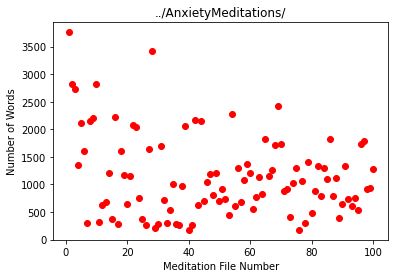

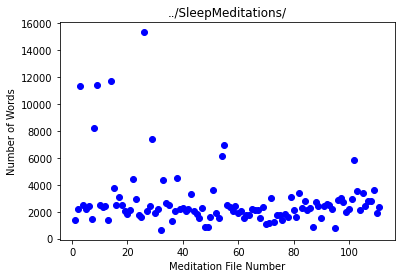

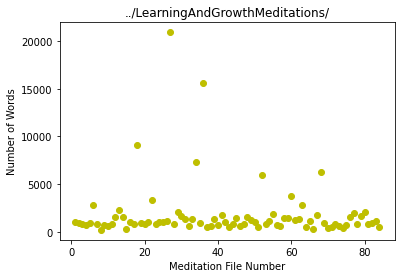

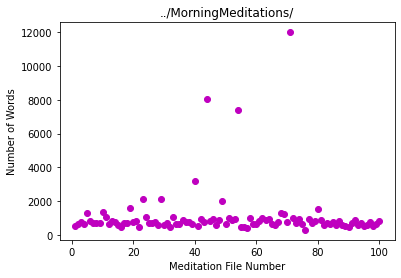

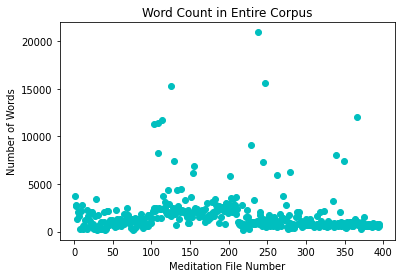

In [1]:
# number of words per document and top words
import nltk
import glob
import os
import matplotlib.pyplot as plt
folderpaths = ['../AnxietyMeditations/', '../SleepMeditations/',
               '../LearningAndGrowthMeditations/', '../MorningMeditations/']

lengths = []
file_nums = []
curr_file = 0

# all words combined 
all_lengths = []
all_file_nums = []
file_num = 0
colors = ['r', 'b', 'y', 'm']
c_i = 0
for folder in folderpaths:
    for doc in glob.glob(os.path.join(folder, '*.txt')):
        # print(doc)
        with open(doc, 'r') as f:
            text = f.read()
            curr_words = nltk.word_tokenize(text)
            lengths.append(len(curr_words))
            all_lengths.append(len(curr_words))
            curr_file+=1
            file_nums.append(curr_file)
            file_num+=1
            all_file_nums.append(file_num)


    
    plt.title(f'{folder}')
    plt.xlabel('Meditation File Number')
    plt.ylabel('Number of Words')
    plt.scatter(file_nums, lengths, c=colors[c_i])
    plt.show()
    lengths = []
    file_nums = []
    curr_file = 0
    c_i+=1
     


# visualize average number of words, lowest, highest
plt.title('Word Count in Entire Corpus')
plt.xlabel('Meditation File Number')
plt.ylabel('Number of Words')
plt.scatter(all_file_nums, all_lengths, c = 'c')
plt.show()

# Word Level Statistics

Below are the average, standard deviation, minimum, and maximum number of words seen across the entire meditation corpus. 

In [2]:
# average number of words, lowest, highest
import numpy as np

avg = np.mean(all_lengths)
print(f'Average number of words across meditations: {avg:.2f}')

min_words = np.min(all_lengths)
print(f'Minimum number of words across meditations: {min_words}')

max_words = np.max(all_lengths)
print(f'Maximum number of words across meditations: {max_words}')

std = np.std(all_lengths)
print(f'Standard deviation of number of words across meditations: {std:.2f}')


Average number of words across meditations: 1741.33
Minimum number of words across meditations: 176
Maximum number of words across meditations: 20942
Standard deviation of number of words across meditations: 2136.09


In [ ]:
# format into a table
import pandas as pd



# Top K Words

Below I read in each word in each folder and proprocessed by normalizing the tokens, stripping punctuation, and removing stop words to only include content words. 

In [18]:
# Top k words
import nltk
import glob
import os
import string
folderpaths = ['../AnxietyMeditations/', '../SleepMeditations/',
               '../LearningAndGrowthMeditations/', '../MorningMeditations/']

def topKWords(k, folderpaths):
    most_common_words = []
    for folder in folderpaths:
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                text = text.translate(
                    str.maketrans('', '', string.punctuation))
                curr_words = nltk.word_tokenize(text)

                #allWordDist = nltk.FreqDist(w.lower() for w in curr_words)

                stopwords = nltk.corpus.stopwords.words('english')
                allWordExceptStopDist = nltk.FreqDist(
                    w.lower() for w in curr_words if w not in stopwords)

                mostCommon= allWordExceptStopDist.most_common(k)

                most_common_words.append(mostCommon)

    return most_common_words

# remove punctunaction, prepositions, keep only content words

top_k_words_per_doc = topKWords(5, folderpaths)
print(top_k_words_per_doc[:5])

[[('back', 37), ('youre', 32), ('side', 29), ('right', 28), ('eyes', 26)], [('music', 63), ('mind', 15), ('time', 15), ('let', 14), ('see', 13)], [('let', 45), ('go', 41), ('body', 24), ('light', 20), ('potential', 19)], [('i', 80), ('relaxation', 15), ('feel', 15), ('accept', 13), ('selfesteem', 11)], [('body', 19), ('breath', 18), ('feel', 16), ('present', 12), ('place', 12)]]


# Number of Sentences across the Corpus
Similarly to plotting the number of words per meditation category across each meditation document and then for all the categories combined, refer to the plots below, respectively for the sentence-level equivalent. I plotted the avergae number of sentences for each file number for each category and across categories. I used NLTK sentence level tokenization to achieve these results. 

A key disclaimer is that meditations are continuous and free-flowing, so very few have punctuaction and thus the sentence length will be extremely large. We can look into making a RNN model to train to identify how to split sentences up without periods. 

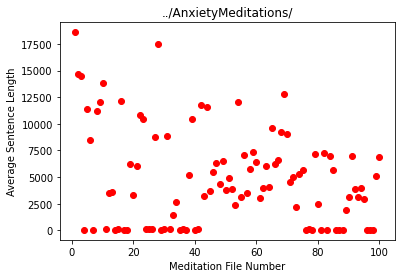

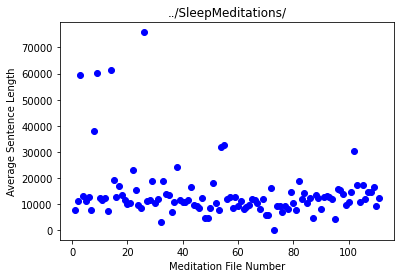

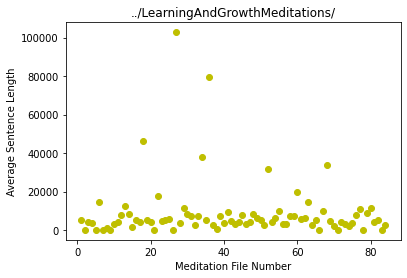

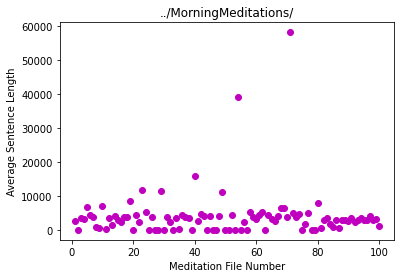

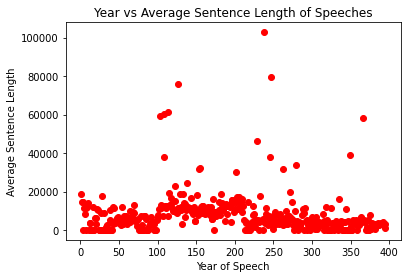

In [4]:

sentence_lengths = {}
avg_sentence_lengths = []
avg_sentence_lengths_across = []
fileCount = 0
file_nums = []
c_i = 0
for folder in folderpaths:
    for doc in glob.glob(os.path.join(folder, '*.txt')):
        # print(doc)
        with open(doc, 'r') as f:
            text = f.read()

            sentences = nltk.sent_tokenize(text, language='english')
            curr_sentence_lengths = []

            for sentence in sentences:
                curr_sentence_lengths.append(len(sentence))
            sentence_lengths[fileCount] = curr_sentence_lengths
            fileCount += 1
            file_nums.append(fileCount)
            # iterate through each sentence and get length of each
            avg_sentence_lengths.append(np.mean(curr_sentence_lengths))
            avg_sentence_lengths_across.append(np.mean(curr_sentence_lengths))
    plt.title(f'{folder}')
    plt.xlabel('Meditation File Number')
    plt.ylabel('Average Sentence Length')
    plt.scatter(file_nums, avg_sentence_lengths, c=colors[c_i])
    plt.show()
    avg_sentence_lengths = []
    file_nums = []
    fileCount = 0
    c_i += 1

plt.scatter(all_file_nums, avg_sentence_lengths_across, c='r')
plt.xlabel('Year of Speech')
plt.ylabel('Average Sentence Length')
plt.title('Year vs Average Sentence Length of Speeches')
plt.show()


# Sentence Level Statistics

Since the sentences are not tokenized accurately, the statistics will be skewed so we can work on this when we have a customized model for meditations specifically to accurately predict the number of sentences in meditations. 